# Regresión Múltiple

## Nociones previas

Consideremos las lecturas de presión arterial tomadas en el estudio NHANES. A cada individuo se le toma la presión arterial tres veces. Aquí trazaremos la primera lectura contra la segunda lectura, usando un gráfico de dispersión:


In [4]:
!pip install nhanes
from nhanes.load import load_NHANES_data
nhanes_data = load_NHANES_data()
#adult_nhanes_data = nhanes_data.query('AgeInYearsAtScreening > 17')
#adult_nhanes_data = adult_nhanes_data.dropna(subset=['StandingHeightCm']).rename(columns={'StandingHeightCm': 'Height'})
#adult_nhanes_data = adult_nhanes_data.dropna(subset=['WeightKg']).rename(columns={'WeightKg': 'Weight'})

In [11]:
import pandas as pd
df = pd.read_csv("https://socialsciences.mcmaster.ca/jfox/Books/Applied-Regression-3E/datasets/Davis.txt", sep=r'\s{1,}', engine='python')
davis_data = df[df['sex'] == 'F']
davis_data = davis_data.query('weight < 100')
davis_data

,sex,weight,height,reportedWeight,reportedHeight
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
5,F,59,157,59.0,155.0
13,F,51,161,52.0,158.0
14,F,64,168,64.0,165.0
...,...,...,...,...,...
188,F,58,169,54.0,166.0
190,F,50,158,49.0,155.0
193,F,59,164,59.0,165.0
194,F,51,156,51.0,158.0


<AxesSubplot:xlabel='reportedWeight', ylabel='weight'>

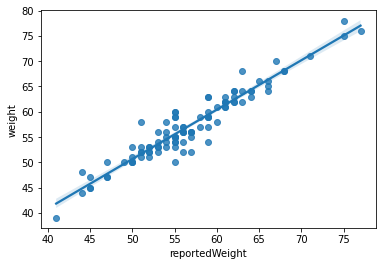

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='reportedWeight',
            y='weight',
            data = davis_data)
#plt.xlabel('Presión Arterial - Primera lectura',size=14);
#plt.ylabel('Presión Arterial - Segunda lectura',size=14);

La relación entre el peso medido y el informado parece ser lineal, por lo que es razonable ajustar una línea al gráfico. Una línea nos ayudará a determinar si los sujetos del estudio de Davis fueron informadores precisos e imparciales de sus pesos, y puede proporcionar una base para predecir el peso medido de mujeres similares para las que solo está disponible el peso informado.

Denotando el peso medido por Y y el peso reportado por X, una línea que relaciona las dos variables tiene la ecuación:

$$ Y = A + BX $$

Sin embargo, es obvio que ninguna línea puede atravesar perfectamente todos los puntos de datos, a pesar de la fuerte relación lineal entre estas dos variables. Introducimos un residuo, E, en la ecuación de regresión para reflejar este hecho:

$$ Y_{i} = A + BX_{i} + E_{i} $$
$$ Y_{i} = \hat{Y_{i}} + E_{i} $$

donde $ \hat{Y_{i}} = A + BX_{i} + E_{i} $ es el valor ajustado para la observación i.

Veamos esta representación de manera geométrica:

<p align="center">
  <img width="500" src="regresiongeometry.png" alt="Variable Types">
</p>


La imagen muestra que el residuo 

$$ E_{i} = Y_{i} - \hat{Y_{i}} = Y_{i} - (A + BX_{i})  $$

es la distancia vertical con signo entre el punto y la línea; es decir, el residuo es negativo cuando el punto está debajo de la línea y positivo cuando el punto está por encima de la línea.

En primer lugar, queremos residuos que sean de pequeña magnitud, porque los residuos negativos grandes son tan ofensivos como los positivos grandes.

Inmediatamente se presentan dos posibilidades: podemos emplear las distancias verticales sin signo entre los puntos y la línea, es decir, los valores absolutos de los residuales, o podemos emplear los cuadrados de los residuales.

La primera posibilidad conduce a una regresión de valor mínimo absoluto (LAV): $ \sum \left | E_{i} \right | $

La segunda posibilidad conduce al criterio de mínimos cuadrados: $\sum  E_{i}^{2}$

Los cuadrados son más manejables matemáticamente que los valores absolutos, por lo que aquí nos centraremos en los mínimos cuadrados.

El criterio de mínimos cuadrados minimiza la suma de los residuos cuadrados en todas las observaciones; es decir, buscamos los valores de A y B que minimicen:

$$ SS_{error} =  \sum_{i=1}^{n}  E_{i}^{2} = ( Y_{i} - \hat{Y_{i}} )^{2} $$

$$ SS_{error} = \sum (Y_{i} - A - BX_{i})^{2} $$

Aplicando un poco de cálculo, se puede llegar a que los coeficientes que minimizan esta expresión son los siguientes:

$$ A = \bar{Y} - BX\bar{X} $$

$$ B =  \frac{\sum ( X_{i} - \bar{X} ) (Y_{i} - \bar{Y})}{\sum(X_{i} - \bar{X})^{2}}    $$


Para evaluar la bondad de ajuste de nuestro modelo, necesitamos apreciarlo en perspectiva. Para ello podemos tomar la suma de cuadrados (o varianza) total de nuestros datos:

$$ SS_{total} = (Y_{i} - \bar{Y})^{2}  $$

y la suma de cuadrados del modelo (o varianza explicada):

$$ SS_{model} = (\hat{Y_{i}} - \bar{Y})^{2} $$

Podemos compararlas evaluando su ratio:

$$ R^{2} = \frac{SS_{model}}{SS_{total}} = 1 - \frac{SS_{error}}{SS_{total}} $$

A esta descomposición de la variación total en componentes "explicados" y "no explicados" se le denomina *análisis de varianza* de la regresión: 

$$ SS_{total} = SS_{model} + SS_{error} $$

En general, podemos extender las nociones de la regresión lineal a varias variables explicativas de manera sencilla. Para el caso general de k variables explicativas, la ecuación de regresión múltiple es:

$$ Y_{i} = A + B_{1}X_{i1} + B_{2}X_{i2} + ... + B_{k}X_{ik} + E_{i} $$
$$ Y_{i} = \hat{Y_{i}} + E_{i} $$

Y la suma de cuadrados de los residuos:

$$ SS_{error} = \sum [ (Y_{i} - ( A - B_{1}X_{1i} + B_{2}X_{i2} + ... + B_{k}X_{ik}) ] ^{2} $$

Las variables, como X e Y en la regresión simple, pueden tratarse como vectores — $\mathbf{x}$ e $\mathbf{y}$ — en el espacio n-dimensional cuyos ejes están dados por las observaciones. Escrito en forma vectorial, el modelo de regresión simple es:

$$ \mathbf{y} = \alpha \mathbf{1_{n}} + \beta \mathbf{x} + \epsilon $$

Entonces, la regresión por mínimos cuadrados

$$ \mathbf{y} = \mathbf{A1_{n}} + B\mathbf{x} + \mathbf{e} $$

Se encuentra proyectando $\mathbf{y}$ ortogonalmente sobre el plano generado por $\mathbf{1_{n}}$ y $\mathbf{x}$, minimizando así la suma de los residuos al cuadrado $ \left \| \mathbf{e} \right \|^{2}$.

Veámoslo graficamente a partir de esta imagen tomada de Fox (20): 

<p align="center">
  <img width="500" src="regresionvectorgeometry.png" alt="Variable Types">
</p>

Podemos apreciar que minimizar la suma residual de cuadrados equivale a hacer que el vector $\mathbf{e}$ sea lo más corto posible. Y que el vector $\mathbf{ \hat{y} }$ es la proyección ortogonal de $\mathbf{y}$ en el plano formado por {$  \mathbf{1_{n}}, \mathbf{x}$ }.

Podemos simplificar la representación vectorial de la regresión simple eliminando el regresor constante $1_{n}$ y el coeficiente de intersección *A*. Esto se logra centrando los vectores en la media:

<p align="center">
  <img width="500" src="regresionvectorgeometrysimple.png" alt="Variable Types">
</p>

La correlación entre X e Y es el coseno del ángulo W que separa los vectores $\mathbf{x^{\star}}$ e $\mathbf{y^{\star}}$.

Veamos ahora la formulación del modelo de regresión en su forma matricial:

$$ \begin{bmatrix} Y_{1} \\ Y_{2} \\ \vdots \\ Y_{n} \end{bmatrix} = \begin{bmatrix} 1 & x_{11} & \cdots & x_{1k} \\ 1 & x_{21} & \cdots & x_{2k}\\ \vdots & \vdots & & \vdots\\ 1 & x_{n1} & \cdots & x_{nk} \end{bmatrix} \begin{bmatrix} \beta_{0}\\ \beta_{1}\\ \vdots\\ \beta_{n} \end{bmatrix} + \begin{bmatrix} \epsilon_{1}\\ \epsilon_{2}\\ \vdots\\ \epsilon_{n} \end{bmatrix} $$



$$ \mathbf{y} = \mathbf{X} \mathbf{\beta} + \mathbf{\epsilon}  $$ 

donde: 
- $\mathbf{y}$ es un vector $n \times 1$ de observaciones de variables de respuesta;
- $\mathbf{X}$ es una matriz de regresores $ n \times k + 1 $ (denominada matriz modelo), que incluye una columna inicial de 1 para el regresor constante; 
- $\mathbf{\beta}$ es un vector $k + 1 \times 1$ de parámetros a estimar; 
- $\mathbf{\epsilon}$ un vector de errores $n \times 1$.

Y el ajuste por el método de mínimos cuadrados:

$$ \mathbf{y} = \mathbf{X} \mathbf{b} + \mathbf{e}  $$ 

$$ \mathbf{b} = (\mathbf{X}^\mathsf{T} \mathbf{X})^{-1} \mathbf{X^\mathsf{T}} \mathbf{y}  $$ 

Ejemplo de regresión múltiple matricial.

In [7]:
df = pd.read_csv("https://socialsciences.mcmaster.ca/jfox/Books/Applied-Regression-3E/datasets/Ginzberg.txt", sep=r'\s{1,}', engine='python')
ginzberg_data = df.drop(columns=['adjsimplicity', 'adjfatalism', 'adjdepression'])
ginzberg_data

,simplicity,fatalism,depression
1,0.92983,0.35589,0.59870
2,0.91097,1.18439,0.72787
3,0.53366,-0.05837,0.53411
4,0.74118,0.35589,0.56641
5,0.53366,0.77014,0.50182
...,...,...,...
78,1.04302,1.80577,1.47061
79,1.79763,2.22003,1.40603
80,2.11834,0.77014,2.01960
81,1.42033,1.18439,1.47061


## Diseño de un modelo de regresión múltiple

La adaptabilidad y la flexibilidad son dos razones principales para el uso generalizado de la regresión múltiple en una amplia variedad de aplicaciones. Como verás en las siguientes secciones, la regresión múltiple puede representar una amplia gama de relaciones de dependencia. Al hacerlo, el investigador incorpora tres características:

- Tamaño de muestra
- Transformaciones de datos
- Naturaleza de la relación de las variables independientes

### Tamaño de muestra

El investigador siempre debe estar consciente de la potencia estadística anticipada de cualquier análisis de regresión múltiple propuesto. Para ello tomemos como referencia la siguiente tabla tomada de Hair et al. (2019):

<p align="center">
  <img width="500" src="regresionstatisticalpower.png" alt="Variable Types">
</p>

La tabla muestra el $R^{2}$ mínimo que se puede encontrar estadísticamente significativo con una potencia de .80 para diferentes números de variables independientes y tamaños de muestra. 

Adicionalmente, se recomienda considerar un **ratio de observaciones a variables de 5:1**, pero la relación preferida es 15:1 o 20:1.

Esto permite maximizar los grados de libertad, lo cual mejora la generalización y aborda tanto la parsimonia del modelo como preocupaciones sobre el tamaño de la muestra.

### Transformaciones de datos

Un problema que a menudo enfrentan los investigadores es el deseo de incorporar datos no métricos, como género u ocupación, en una ecuación de regresión. Sin embargo, como ya comentamos, la regresión se limita a los datos métricos.

¿Qué podemos hacer cuando las variables independientes no son métricas y tienen dos o más categorías?

Podemos emplear variables dicotómicas, conocidas como variables ficticias, que pueden actuar como variables independientes de reemplazo. Cada variable ficticia representa una categoría de una variable independiente no métrica, y cualquier variable no métrica con k categorías se puede representar con k-1 variables ficticias.

La forma más común es la codificación de indicadores en la que cada categoría de la variable no métrica está representada por 1 o 0. 

### Efectos moderadores 

¿Qué pasa si una relación de variable independiente-dependiente se ve afectada por otra variable independiente? Esta situación se denomina efecto moderador y se produce cuando la variable moderadora, una segunda variable independiente, cambia la forma de la relación entre otra variable independiente y la variable dependiente. También se conoce como efecto de interacción y es similar al término de interacción que se encuentra en ANOVA y MANOVA.

La relación moderadora puede expresarse de la siguiente forma:

$$ Y = B_{0} + B_{1}X_{1} + B_{2}X_{2} + B_{3}X_{1}X_{2} $$

donde:

- $B_{0}$: intercepto
- $B_{1}X_{1}$: efecto lineal de $X_{1}$
- $B_{2}X_{2}$: efecto lineal de $X_{2}$
- $B_{3}X_{1}X_{2}$: efecto moderador de $X_{2}$ en $X_{1}$ 

### Mediación

La mediación ocurre cuando el efecto de una variable independiente puede "funcionar" a través de una variable mediadora para predecir la variable dependiente. En esta situación, la variable independiente puede tener un efecto directo sobre la medida dependiente, así como un efecto indirecto a través de la variable mediadora sobre la variable dependiente. Revisaremos más sobre este concepto en la sección de modelos de ecuaciones estructurales.

En general, la selección de una variable para que sea mediadora o moderadora debe basarse en fundamentos conceptuales más que empíricos.


## Supuestos de un modelo de regresión múltiple

Los supuestos que se examinarán se encuentran en cuatro áreas:

- Linealidad del fenómeno medido
- Varianza constante de los términos de error
- Normalidad de la distribución del término de error
- Independencia de los términos de error.

En general, **se evalúa en los residuos**. Es decir, en la diferencia entre los valores observados y los valores predichos para la variable dependiente.

Para ello, podemos optar por estrategias gráficas e inferenciales.

Para la evaluación gráfica basta aplicar los mismos principios que revisamos en la Unidad 2, pero aplicados al gráfico de residuales:

<p align="center">
  <img width="500" src="residualsgraphs.png" alt="Variable Types">
</p>

Revisemos estos cuatro criterios en un ejemplo. Consieremos el siguiente modelo de regresión múltiple:

$$ Y_{Depression} = B_{0} + B_{Fatalism} X_{Fatalism} + B_{Simplicity} X_{Simplicity} $$

In [69]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm

# Fit regression model 
model = smf.ols("depression ~ fatalism + simplicity", data=ginzberg_data).fit();

In [64]:
#fig = sm.graphics.plot_regress_exog(results, "fatalism")
#fig.tight_layout(pad=1.0)

### Linealidad

La linealidad de la relación entre las variables dependientes e independientes representa el grado en que el cambio en la variable dependiente está asociado con la variable independiente.

Visualicemos la linealidad de los residuos en nuestro ejemplo: 

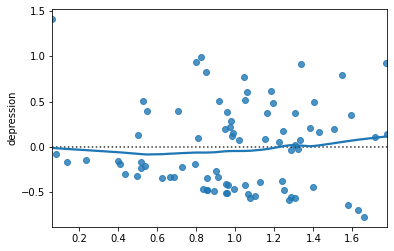

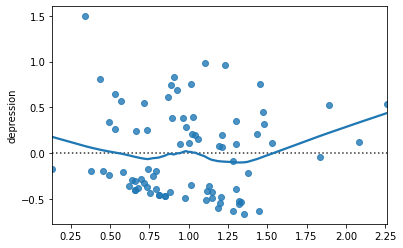

In [70]:
import seaborn as sns

plt.figure(1)
sns.residplot(x='fatalism', y='depression', x_partial='simplicity', data = ginzberg_data, lowess=True);
plt.figure(2)
sns.residplot(x='simplicity', y='depression', x_partial='fatalism', data = ginzberg_data, lowess=True);

Aquí podemos apreciar que no hay una estructura marcadamente definida en los residuos, dado que la linea entera se aproxima a la línea punteada (que representa el valor predicho por el modelo) para cada regresor (variable independiente predictora). Aunque para el caso de la variable `simplicity` sí hay una desviación importante.

Podemos confirmar nuestra apreciación gráfica con la Prueba del multiplicador de Harvey-Collier, que evalúa la hipótesis nula de que la especificación lineal es correcta.

In [71]:
# Inspect linearity
name = ["t value", "p value"]
test = sms.linear_harvey_collier(results)
list(zip(name, test))

[('t value', 5.146280012850992), ('p value', 1.934144653076191e-06)]

Según la prueba de Harvey-Collier, el supuesto de linealidad no se cumpliría en nuestros datos. 

### Homocedasticidad de los residuos

La presencia de variaciones desiguales (heterocedasticidad) es una de las violaciones de supuestos más comunes. En estos casos, los términos de error (residuos) no son constantes en todo el rango de la variable independiente. Esta falta de varianza constante en los residuos no sesga los coeficientes estimados, pero sí causa una estimación inexacta de los errores estándar de las estimaciones.

Evaluemos este supuesto en nuestro ejemplo. Para ello, aplicaremos la preuba de Breusch-Pagan:

In [72]:
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(model.resid, model.model.exog)
list(zip(name, test))

[('Lagrange multiplier statistic', 5.738434566245847),
 ('p-value', 0.056743323159302465),
 ('f-value', 2.972246426853247),
 ('f p-value', 0.05694146118483065)]

Según esta prueba, no podemos rechazar la hipótesis nula de que las varianzas de los residuos son homogéneas. Dado que se trata de un caso limítrofe, veamos una prueba alternativa, la prueba de Goldfeld-Quandt:

In [73]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
list(zip(name, test))

[('F statistic', 27.25304213788146), ('p-value', 2.5697553689056593e-18)]

Esta prueba nos indica que podemos rechazar la hipótesis nula de homogeneidad de varianzas de los residuos. 

### Normalidad de los residuos

Si bien técnicamente el supuesto de normalidad se aplica solo a los residuos, cualquier intento de remediar la no normalidad implica evaluar la no normalidad de las variables independientes o dependientes o ambas.

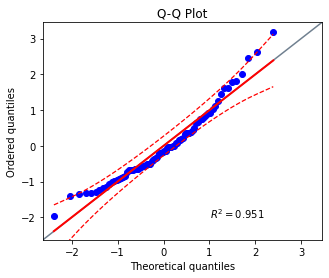

In [83]:
import pingouin as pg
pg.qqplot(model.resid);

Evaluemos este supuesto en nuestro ejemplo con la prueba de Jarque-Bera:

In [75]:
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(model.resid)
list(zip(name, test))

[('Jarque-Bera', 11.424710465430577),
 ('Chi^2 two-tail prob.', 0.0033048796108360976),
 ('Skew', 0.8572599286300349),
 ('Kurtosis', 3.6357982040396966)]

La prueba de Jarque-Bera nos indica que no podemos asumir la normalidad de los residuos.

### Independencia de las observaciones

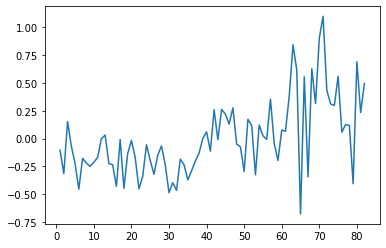

In [79]:
plt.plot(model.resid.index, model.resid)

https://medium.com/keita-starts-data-science/heteroskedasticity-in-linear-regressions-and-python-16eb57eaa09
https://zhiyzuo.github.io/Linear-Regression-Diagnostic-in-Python/

https://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html
https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html

https://towardsdatascience.com/assumptions-of-linear-regression-fdb71ebeaa8b

## Estimación y evaluación

## Interpretación

Sesion 1

- Nociones previas: cálculos/visualizaciones basadas en álgebra de matrices y matriz de covarianza
- Models (simple form pg 82 y 106)
- Geometry (pg 245)
- Linear models in matrix form (pg 203 y 208):
Fits, Estimators

http://www.utstat.toronto.edu/~brunner/books/LinearModelsInStatistics.pdf
pg 139
pg 339

- Modelo de regresión múltiple: diseño, supuestos, estimación y evaluación, interpretación

Sesion 2
- Mate de Log
- Modelo de regresión logística: diseño, supuestos, estimación y evaluación, interpretación - BREVE
- Mate de ANOVA
- MANOVA: diseño, supuestos, estimación y evaluación, interpretación

http://www.gastonsanchez.com/matrix4sl/relation-as-linear-approximation.html